<a href="https://colab.research.google.com/github/DavorJordacevic/TensorFlow-Keras-Neural-Networks/blob/master/Autoencoders_for_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

%matplotlib inline

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
class Encoder(Sequential):
  def __init__(self):
    super().__init__()

    self.add(Flatten(input_shape=(28, 28)))
    self.add(Dense(400, activation='relu'))
    self.add(Dense(200, activation='relu'))
    self.add(Dense(100, activation='relu'))
    self.add(Dense(50,  activation='relu'))
    self.add(Dense(25,  activation='relu'))

In [0]:
class Decoder(Sequential):
  def __init__(self):
    super().__init__()

    self.add(Dense(50,   activation='relu', input_shape=[25]))
    self.add(Dense(100,  activation='relu'))
    self.add(Dense(200,  activation='relu'))
    self.add(Dense(400,  activation='relu'))
    self.add(Dense(784,  activation='sigmoid'))
    self.add(Reshape([28, 28]))

In [0]:
encoder = Encoder()
decoder = Decoder()

In [0]:
autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss= 'binary_crossentropy',
                    optimizer= SGD(1.5),
                    metrics=['accuracy'])

In [0]:
autoencoder.fit(X_train, X_train,
                epochs= 5,
                validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2425 - accuracy: 0.7913 - val_loss: 0.2030 - val_accuracy: 0.7939
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1857 - accuracy: 0.7980 - val_loss: 0.1725 - val_accuracy: 0.7955
Epoch 3/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1572 - accuracy: 0.8027 - val_loss: 0.1468 - val_accuracy: 0.8040
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1430 - accuracy: 0.8055 - val_loss: 0.1351 - val_accuracy: 0.8067
Epoch 5/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1354 - accuracy: 0.8069 - val_loss: 0.1323 - val_accuracy: 0.8071


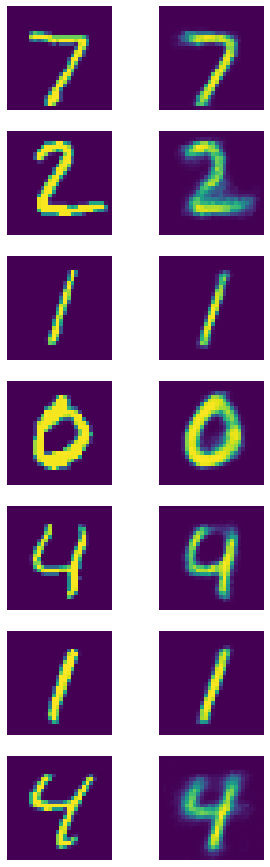

In [0]:
image_batch = autoencoder.predict(X_test[:8])

plt.figure(figsize=(5,18))

for i, j, k in zip(range(8),
                   range(1, 15, 2),
                   range(2, 16, 2)):
  plt.subplot(8,2, j)
  plt.axis('off')
  plt.imshow(X_test[i])
  plt.subplot(8,2, k)
  plt.axis('off')
  plt.imshow(image_batch[i])

4423680/4422102 [==============================] - 0s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3976 - accuracy: 0.4887 - val_loss: 0.3425 - val_accuracy: 0.4988
Epoch 2/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3307 - accuracy: 0.4996 - val_loss: 0.3253 - val_accuracy: 0.4972
Epoch 3/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3173 - accuracy: 0.5022 - val_loss: 0.3165 - val_accuracy: 0.5022
Epoch 4/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3107 - accuracy: 0.5034 - val_loss: 0.3083 - val_accuracy: 0.5024
Epoch 5/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3059 - accuracy: 0.5044 - val_loss: 0.3043 - val_accuracy: 0.5027


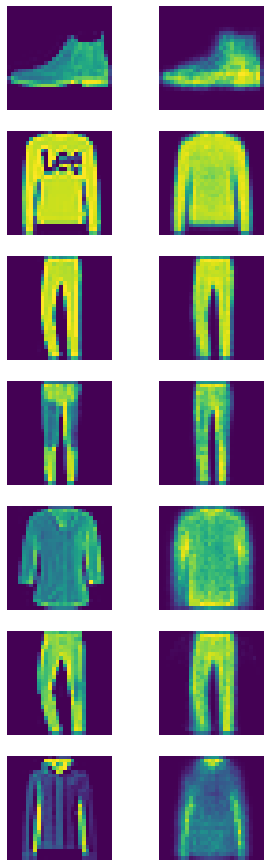

In [0]:
# Fashion MNIST

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

encoder = Encoder()
decoder = Decoder()

autoencoder = Sequential([encoder, decoder])

autoencoder.compile(loss= 'binary_crossentropy',
                    optimizer= SGD(1.3),
                    metrics=['accuracy'])

autoencoder.fit(X_train, X_train,
                epochs= 5,
                validation_data=[X_test, X_test])


image_batch = autoencoder.predict(X_test[:8])
plt.figure(figsize=(5,18))

for i, j, k in zip(range(8),
                   range(1, 15, 2),
                   range(2, 16, 2)):
  plt.subplot(8,2, j)
  plt.axis('off')
  plt.imshow(X_test[i])
  plt.subplot(8,2, k)
  plt.axis('off')
  plt.imshow(image_batch[i])